# Maze 8x8 - v1

In [1]:
import utils_maze as utils

import numpy as np
import datetime
import matplotlib.pyplot as plt
# import imageio
import os

%matplotlib inline

Using TensorFlow backend.


![SegmentLocal](20190602_2102_gif_8x8v1/seq_movie.gif "segment")

In [2]:
rat_mark = 0.5      # The current rat cell will be painteg by gray 0.5
epsilon = 0.1       # Exploration factor

LEFT = 0
UP = 1
RIGHT = 2
DOWN = 3

# Actions dictionary
actions_dict = {
    LEFT: 'left',
    UP: 'up',
    RIGHT: 'right',
    DOWN: 'down',
}
num_actions = len(actions_dict)




maze =  np.array([
    [ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.],
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.],
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.]
])

In [3]:
now_str = datetime.datetime.now().strftime('%Y%m%d_%H%M')
folder_name_gif = now_str + '_gif'
folder_name_pngs = folder_name_gif + '/pngs'

utils.create_folder(folder_name_gif)
utils.create_folder(folder_name_pngs)

Successfully created the directory 20190602_2102_gif 
Successfully created the directory 20190602_2102_gif/pngs 


In [4]:
model = utils.build_model(maze, num_actions=num_actions)

# default settings:
# n_epoch=15'000 | max_memory=1000 | data_size=50
utils.qtrain(model=model, maze=maze, n_epoch=1000, max_memory=8*maze.size, data_size=32, rat_mark=rat_mark, epsilon=epsilon)

number of epochs=  1000
Epoch: 000/999 | Loss: 0.0014 | Episodes: 150 | Win count: 0 | Win rate: 0.000 | time: 4.7 seconds
Epoch: 001/999 | Loss: 0.0741 | Episodes: 141 | Win count: 0 | Win rate: 0.000 | time: 8.5 seconds
Epoch: 002/999 | Loss: 0.0013 | Episodes: 147 | Win count: 0 | Win rate: 0.000 | time: 12.6 seconds
Epoch: 003/999 | Loss: 0.0028 | Episodes: 139 | Win count: 0 | Win rate: 0.000 | time: 16.4 seconds
Epoch: 004/999 | Loss: 0.0016 | Episodes: 138 | Win count: 0 | Win rate: 0.000 | time: 20.4 seconds
Epoch: 005/999 | Loss: 0.0015 | Episodes: 144 | Win count: 0 | Win rate: 0.000 | time: 24.5 seconds
Epoch: 006/999 | Loss: 0.0079 | Episodes: 141 | Win count: 0 | Win rate: 0.000 | time: 28.4 seconds
Epoch: 007/999 | Loss: 0.0471 | Episodes: 142 | Win count: 0 | Win rate: 0.000 | time: 32.3 seconds
Epoch: 008/999 | Loss: 0.0018 | Episodes: 137 | Win count: 0 | Win rate: 0.000 | time: 36.0 seconds
Epoch: 009/999 | Loss: 0.0515 | Episodes: 137 | Win count: 0 | Win rate: 0.000

340.027067

In [5]:
# Does the model win for all possible free-cells?
#    (this check is being done inside train-function)
utils.completion_check(model=model, qmaze=utils.Qmaze(maze))

True

True

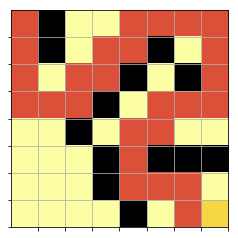

In [6]:
utils.play_game_and_plot(model=model, qmaze=utils.Qmaze(maze), rat_cell=(0,0), folder_name_pngs=folder_name_pngs)

In [8]:
filenames_pngs = os.listdir(folder_name_pngs)
utils.create_gif(folder_name_pngs, folder_name_gif, filenames_pngs)

Finished